# K-Means Clustering

This note introduces the **K-Means Clustering** algorithm using `scikit-learn`, explains the step-by-step logic behind how it works, and then demonstrates a from-scratch implementation to show that the core idea is simple and easy to build.

## What is K-Means?

K-Means Clustering is like grouping similar items together — it finds patterns in the data and organizes them into clusters based on how close they are to each other.

Unlike supervised learning (like KNN), K-Means is unsupervised — it doesn't need labels. It just looks at the structure of the data and tries to find natural groupings.

It works by:
1. Picking `k` cluster centers (centroids)
2. Assigning each point to the nearest center
3. Updating the centers to be the average of the points in their cluster
4. Repeating the process until the centers stop changing

This notebook will:
- Use `scikit-learn` to show how K-Means works in practice  
- Explain the intuition and steps in a beginner-friendly way  
- Implement K-Means from scratch to understand the core logic behind it

## Preparation

Let's import the required libraries and create some data.

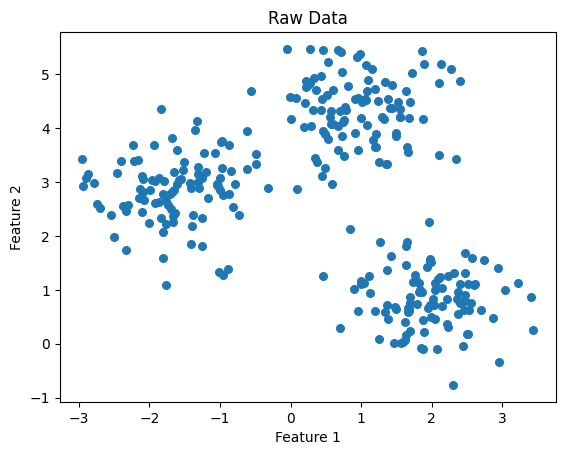

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic 2D data
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

# Visualize raw data
plt.scatter(X[:, 0], X[:, 1], s=30)
plt.title("Raw Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

Here we can see the data. Let's use scikit-learn to cluster it.

## Implement with Scikit-Learn

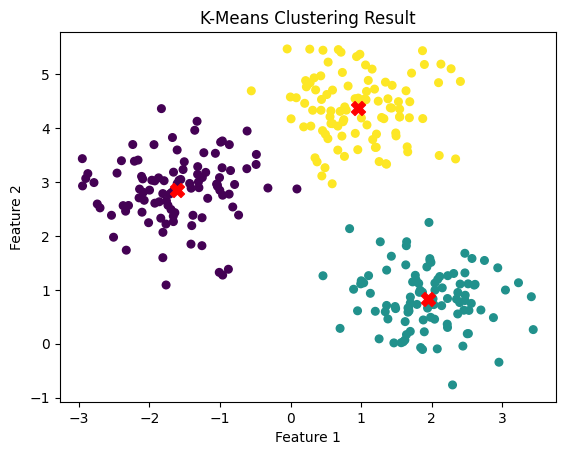

In [ ]:
# Create KMeans model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

# Predicted cluster labels
y_kmeans = kmeans.predict(X)

# Cluster centers
centers = kmeans.cluster_centers_

# Visualize clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=30, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, marker='X')
plt.title("K-Means Clustering Result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## Understanding the Visualization

Each color area shows how the computer "thinks" the data is grouped into clusters.

When it sees a point, it assigns it to the **nearest cluster center** (centroid).

Then, it adjusts the cluster centers by computing the **average position** of all points assigned to each cluster.

Dots are the data points, and the **X marks** are the final cluster centers after training.

## Behind the Scenes

### 1. Choose the Number of Clusters (`k`)
- Decide how many groups you want to find in the data.
- Each group will have a center called a **centroid**.

### 2. Initialize the Centroids
- Randomly pick `k` points from the data as the starting centroids.

### 3. Repeat the Following Steps:
#### a. Assign Points to Clusters
- For each data point, find the closest centroid (using distance).
- Assign the point to that cluster.

#### b. Update Centroids
- For each cluster, compute the **mean** (average) of all points assigned to it.
- Move the centroid to that new position.

### 4. Stop When Done
- Repeat steps a and b until the centroids **don’t change much** anymore.
- That means the algorithm has **converged**.

## Distance Formula (Euclidean)

To find which centroid is closest, we use **Euclidean distance**.

$$
\text{distance}(x, c) = \sqrt{(x_1 - c_1)^2 + \cdots + (x_n - c_n)^2}
$$

**Where:**

- $x$ is a data point  
- $c$ is a centroid  
- $x_1, x_2, \ldots, x_n$ are feature values of the point  
- $c_1, c_2, \ldots, c_n$ are feature values of the centroid

> This calculation is handled by `scikit-learn` behind the scenes.

## Let’s Code It


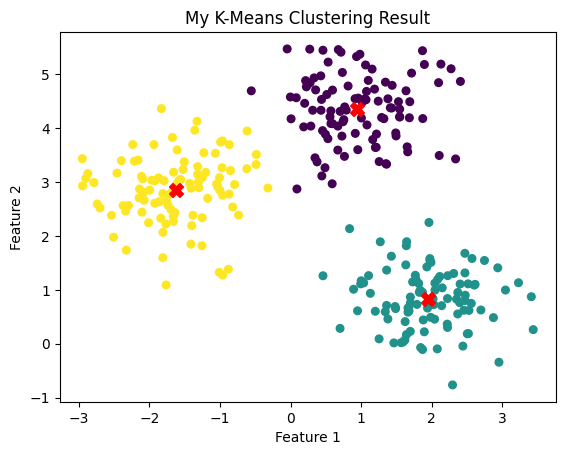

In [ ]:
class MyKMeans:
    def __init__(self, k=3, max_iter=100):
        self.k = k                # Number of clusters
        self.max_iter = max_iter  # Maximum number of update steps

    def fit(self, X):
        # Step 1: Randomly initialize k centroids by sampling from the data
        n_samples, n_features = X.shape
        rng = np.random.default_rng(seed=0)
        indices = rng.choice(n_samples, size=self.k, replace=False)
        self.centroids = X[indices]

        for _ in range(self.max_iter):
            # Step 2a: Assign each point to the nearest centroid

            # Compute distances from every point to every centroid (n_samples x k)
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)

            # Cluster assignments: index of nearest centroid for each point
            self.labels = np.argmin(distances, axis=1)

            # Step 2b: Update centroids based on current assignments

            # For each cluster, compute the mean of the points assigned to it
            new_centroids = np.array([
                X[self.labels == i].mean(axis=0) if np.any(self.labels == i) else self.centroids[i]
                for i in range(self.k)
            ])

            # Stop if centroids didn't change (convergence)
            if np.allclose(self.centroids, new_centroids):
                break

            self.centroids = new_centroids

    def predict(self, X_new):
        # Step 3: Assign each new point to the nearest centroid
        distances = np.linalg.norm(X_new[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

# Instantiate and use the scratch K-Means model
my_kmeans = MyKMeans(k=3)
my_kmeans.fit(X)

# Predict cluster assignments
my_y_kmeans = my_kmeans.predict(X)
my_centers = my_kmeans.centroids

# Visualize clusters
plt.scatter(X[:, 0], X[:, 1], c=my_y_kmeans, s=30, cmap='viridis')
plt.scatter(my_centers[:, 0], my_centers[:, 1], c='red', s=100, marker='X')
plt.title("My K-Means Clustering Result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## It Works!!

The clustering result produced by our scratch **K-Means** implementation matches the result from `scikit-learn`.  
This confirms that the logic we implemented — centroid initialization, distance-based assignment, and centroid updating — behaves as expected.

We've successfully built **K-Means Clustering** from the ground up!